In [30]:
#加载环境

from netCDF4 import Dataset
import numpy as np
import math as Math
import matplotlib as mplt
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap


#解决plot画图无法显示中文的问题
from pylab import mpl
mpl.rcParams['font.sans-serif'] = ['SimHei'] # 指定默认字体  
mpl.rcParams['axes.unicode_minus'] = False # 解决保存图像是负号'-'显示为方块的问题  

#关闭科学计数法（为了画图）
np.set_printoptions(suppress=True) 

In [3]:
#加载文件路径

path = [("ionPrf\ionPrf_C004.2011.091.00.05.G29_2013.3520_nc",
"ionPrf\ionPrf_C002.2011.091.00.08.G11_2013.3520_nc",
"ionPrf\ionPrf_C001.2011.091.00.09.G21_2013.3520_nc",
"ionPrf\ionPrf_C001.2011.091.00.10.G25_2013.3520_nc",
"ionPrf\ionPrf_C005.2011.091.00.12.G22_2013.3520_nc",
"ionPrf\ionPrf_C002.2011.091.00.12.G29_2013.3520_nc",
"ionPrf\ionPrf_C005.2011.091.00.13.G14_2013.3520_nc",
"ionPrf\ionPrf_C006.2011.091.00.16.G10_2013.3520_nc",
"ionPrf\ionPrf_C006.2011.091.00.22.G02_2013.3520_nc",
"ionPrf\ionPrf_C001.2011.091.00.22.G12_2013.3520_nc",
"ionPrf\ionPrf_C002.2011.091.00.22.G22_2013.3520_nc",
"ionPrf\ionPrf_C002.2011.091.00.23.G05_2013.3520_nc",
"ionPrf\ionPrf_C002.2011.091.00.23.G13_2013.3520_nc",
"ionPrf\ionPrf_C001.2011.091.00.23.G18_2013.3520_nc",
"ionPrf\ionPrf_C002.2011.091.00.24.G14_2013.3520_nc",
"ionPrf\ionPrf_C002.2011.091.00.28.G10_2013.3520_nc",
"ionPrf\ionPrf_C001.2011.091.00.28.G22_2013.3520_nc",
"ionPrf\ionPrf_C004.2011.091.00.28.G26_2013.3520_nc",
"ionPrf\ionPrf_C006.2011.091.00.29.G32_2013.3520_nc",
"ionPrf\ionPrf_C002.2011.091.00.30.G02_2013.3520_nc",
"ionPrf\ionPrf_C006.2011.091.00.30.G20_2013.3520_nc",
"ionPrf\ionPrf_C004.2011.091.00.31.G15_2013.3520_nc",
"ionPrf\ionPrf_C001.2011.091.00.32.G15_2013.3520_nc",
"ionPrf\ionPrf_C001.2011.091.00.33.G09_2013.3520_nc",
"ionPrf\ionPrf_C006.2011.091.00.33.G19_2013.3520_nc",
"ionPrf\ionPrf_C006.2011.091.00.34.G26_2013.3520_nc",
"ionPrf\ionPrf_C002.2011.091.00.36.G07_2013.3520_nc",
"ionPrf\ionPrf_C006.2011.091.00.37.G15_2013.3520_nc",
"ionPrf\ionPrf_C001.2011.091.00.37.G27_2013.3520_nc",
"ionPrf\ionPrf_C002.2011.091.00.38.G06_2013.3520_nc",
"ionPrf\ionPrf_C004.2011.091.00.39.G09_2013.3520_nc",
"ionPrf\ionPrf_C002.2011.091.00.39.G26_2013.3520_nc",
"ionPrf\ionPrf_C002.2011.091.00.40.G04_2013.3520_nc",
"ionPrf\ionPrf_C006.2011.091.00.41.G03_2013.3520_nc",
"ionPrf\ionPrf_C002.2011.091.00.42.G08_2013.3520_nc",
"ionPrf\ionPrf_C006.2011.091.00.45.G06_2013.3520_nc",
"ionPrf\ionPrf_C006.2011.091.00.47.G23_2013.3520_nc",
"ionPrf\ionPrf_C006.2011.091.00.48.G09_2013.3520_nc",
"ionPrf\ionPrf_C001.2011.091.00.49.G17_2013.3520_nc",
"ionPrf\ionPrf_C002.2011.091.00.49.G21_2013.3520_nc",
"ionPrf\ionPrf_C006.2011.091.00.49.G31_2013.3520_nc",
"ionPrf\ionPrf_C001.2011.091.00.50.G24_2013.3520_nc",
"ionPrf\ionPrf_C001.2011.091.00.51.G11_2013.3520_nc",
"ionPrf\ionPrf_C006.2011.091.00.54.G16_2013.3520_nc",
"ionPrf\ionPrf_C006.2011.091.00.55.G13_2013.3520_nc",
"ionPrf\ionPrf_C002.2011.091.00.56.G17_2013.3520_nc",
"ionPrf\ionPrf_C001.2011.091.00.56.G28_2013.3520_nc",
"ionPrf\ionPrf_C002.2011.091.00.57.G27_2013.3520_nc",
"ionPrf\ionPrf_C006.2011.091.00.57.G30_2013.3520_nc",
"ionPrf\ionPrf_C002.2011.091.00.58.G28_2013.3520_nc",
"ionPrf\ionPrf_C004.2011.091.00.58.G28_2013.3520_nc",
"ionPrf\ionPrf_C001.2011.091.00.59.G32_2013.3520_nc"),
("ionPrf\ionPrf_C005.2011.091.03.01.G09_2013.3520_nc",
"ionPrf\ionPrf_C001.2011.091.03.01.G26_2013.3520_nc",
"ionPrf\ionPrf_C006.2011.091.03.02.G15_2013.3520_nc",
"ionPrf\ionPrf_C006.2011.091.03.02.G22_2013.3520_nc",
"ionPrf\ionPrf_C001.2011.091.03.05.G08_2013.3520_nc",
"ionPrf\ionPrf_C006.2011.091.03.05.G13_2013.3520_nc",
"ionPrf\ionPrf_C004.2011.091.03.12.G07_2013.3520_nc",
"ionPrf\ionPrf_C005.2011.091.03.12.G12_2013.3520_nc",
"ionPrf\ionPrf_C006.2011.091.03.13.G29_2013.3520_nc",
"ionPrf\ionPrf_C001.2011.091.03.16.G21_2013.3520_nc",
"ionPrf\ionPrf_C006.2011.091.03.18.G14_2013.3520_nc",
"ionPrf\ionPrf_C006.2011.091.03.19.G08_2013.3520_nc",
"ionPrf\ionPrf_C006.2011.091.03.19.G27_2013.3520_nc",
"ionPrf\ionPrf_C001.2011.091.03.20.G19_2013.3520_nc",
"ionPrf\ionPrf_C006.2011.091.03.21.G09_2013.3520_nc",
"ionPrf\ionPrf_C001.2011.091.03.22.G03_2013.3520_nc",
"ionPrf\ionPrf_C001.2011.091.03.24.G06_2013.3520_nc",
"ionPrf\ionPrf_C006.2011.091.03.24.G25_2013.3520_nc",
"ionPrf\ionPrf_C004.2011.091.03.27.G03_2013.3520_nc",
"ionPrf\ionPrf_C001.2011.091.03.27.G18_2013.3520_nc",
"ionPrf\ionPrf_C004.2011.091.03.30.G06_2013.3520_nc",
"ionPrf\ionPrf_C001.2011.091.03.32.G11_2013.3520_nc",
"ionPrf\ionPrf_C005.2011.091.03.32.G20_2013.3520_nc",
"ionPrf\ionPrf_C001.2011.091.03.34.G16_2013.3520_nc",
"ionPrf\ionPrf_C006.2011.091.03.35.G06_2013.3520_nc",
"ionPrf\ionPrf_C004.2011.091.03.35.G18_2013.3520_nc",
"ionPrf\ionPrf_C001.2011.091.03.35.G22_2013.3520_nc",
"ionPrf\ionPrf_C005.2011.091.03.35.G23_2013.3520_nc",
"ionPrf\ionPrf_C005.2011.091.03.36.G32_2013.3520_nc",
"ionPrf\ionPrf_C001.2011.091.03.41.G30_2013.3520_nc",
"ionPrf\ionPrf_C006.2011.091.03.42.G18_2013.3520_nc",
"ionPrf\ionPrf_C006.2011.091.03.43.G22_2013.3520_nc",
"ionPrf\ionPrf_C001.2011.091.03.48.G32_2013.3520_nc",
"ionPrf\ionPrf_C006.2011.091.03.50.G10_2013.3520_nc",
"ionPrf\ionPrf_C006.2011.091.03.50.G23_2013.3520_nc",
"ionPrf\ionPrf_C001.2011.091.03.51.G20_2013.3520_nc",
"ionPrf\ionPrf_C001.2011.091.03.54.G31_2013.3520_nc",
"ionPrf\ionPrf_C006.2011.091.03.55.G17_2013.3520_nc",
"ionPrf\ionPrf_C006.2011.091.03.57.G13_2013.3520_nc",
"ionPrf\ionPrf_C006.2011.091.03.58.G14_2013.3520_nc",
"ionPrf\ionPrf_C004.2011.091.03.58.G29_2013.3520_nc"),
("ionPrf\ionPrf_C005.2011.091.07.00.G07_2013.3520_nc",
"ionPrf\ionPrf_C006.2011.091.07.00.G24_2013.3520_nc",
"ionPrf\ionPrf_C004.2011.091.07.01.G20_2013.3520_nc",
"ionPrf\ionPrf_C001.2011.091.07.03.G08_2013.3520_nc",
"ionPrf\ionPrf_C006.2011.091.07.03.G11_2013.3520_nc",
"ionPrf\ionPrf_C001.2011.091.07.06.G02_2013.3520_nc",
"ionPrf\ionPrf_C002.2011.091.07.06.G10_2013.3520_nc",
"ionPrf\ionPrf_C002.2011.091.07.07.G11_2013.3520_nc",
"ionPrf\ionPrf_C002.2011.091.07.07.G32_2013.3520_nc",
"ionPrf\ionPrf_C006.2011.091.07.08.G05_2013.3520_nc",
"ionPrf\ionPrf_C006.2011.091.07.08.G29_2013.3520_nc",
"ionPrf\ionPrf_C001.2011.091.07.10.G10_2013.3520_nc",
"ionPrf\ionPrf_C001.2011.091.07.11.G07_2013.3520_nc",
"ionPrf\ionPrf_C002.2011.091.07.11.G14_2013.3520_nc",
"ionPrf\ionPrf_C002.2011.091.07.12.G26_2013.3520_nc",
"ionPrf\ionPrf_C002.2011.091.07.14.G02_2013.3520_nc",
"ionPrf\ionPrf_C004.2011.091.07.14.G23_2013.3520_nc",
"ionPrf\ionPrf_C001.2011.091.07.16.G13_2013.3520_nc",
"ionPrf\ionPrf_C006.2011.091.07.17.G19_2013.3520_nc",
"ionPrf\ionPrf_C001.2011.091.07.18.G23_2013.3520_nc",
"ionPrf\ionPrf_C006.2011.091.07.18.G26_2013.3520_nc",
"ionPrf\ionPrf_C004.2011.091.07.19.G13_2013.3520_nc",
"ionPrf\ionPrf_C004.2011.091.07.20.G03_2013.3520_nc",
"ionPrf\ionPrf_C001.2011.091.07.20.G05_2013.3520_nc",
"ionPrf\ionPrf_C002.2011.091.07.20.G22_2013.3520_nc",
"ionPrf\ionPrf_C006.2011.091.07.21.G25_2013.3520_nc",
"ionPrf\ionPrf_C006.2011.091.07.22.G02_2013.3520_nc",
"ionPrf\ionPrf_C006.2011.091.07.23.G15_2013.3520_nc",
"ionPrf\ionPrf_C002.2011.091.07.24.G19_2013.3520_nc",
"ionPrf\ionPrf_C006.2011.091.07.26.G03_2013.3520_nc",
"ionPrf\ionPrf_C002.2011.091.07.26.G31_2013.3520_nc",
"ionPrf\ionPrf_C006.2011.091.07.27.G13_2013.3520_nc",
"ionPrf\ionPrf_C002.2011.091.07.28.G23_2013.3520_nc",
"ionPrf\ionPrf_C001.2011.091.07.29.G03_2013.3520_nc",
"ionPrf\ionPrf_C006.2011.091.07.29.G06_2013.3520_nc",
"ionPrf\ionPrf_C002.2011.091.07.29.G27_2013.3520_nc",
"ionPrf\ionPrf_C001.2011.091.07.30.G16_2013.3520_nc",
"ionPrf\ionPrf_C004.2011.091.07.30.G16_2013.3520_nc",
"ionPrf\ionPrf_C001.2011.091.07.31.G06_2013.3520_nc",
"ionPrf\ionPrf_C002.2011.091.07.32.G09_2013.3520_nc",
"ionPrf\ionPrf_C006.2011.091.07.33.G12_2013.3520_nc",
"ionPrf\ionPrf_C002.2011.091.07.34.G03_2013.3520_nc",
"ionPrf\ionPrf_C006.2011.091.07.35.G27_2013.3520_nc",
"ionPrf\ionPrf_C002.2011.091.07.36.G06_2013.3520_nc",
"ionPrf\ionPrf_C006.2011.091.07.36.G09_2013.3520_nc",
"ionPrf\ionPrf_C001.2011.091.07.36.G30_2013.3520_nc",
"ionPrf\ionPrf_C001.2011.091.07.37.G21_2013.3520_nc",
"ionPrf\ionPrf_C006.2011.091.07.40.G04_2013.3520_nc",
"ionPrf\ionPrf_C002.2011.091.07.40.G30_2013.3520_nc",
"ionPrf\ionPrf_C002.2011.091.07.41.G16_2013.3520_nc",
"ionPrf\ionPrf_C004.2011.091.07.42.G21_2013.3520_nc",
"ionPrf\ionPrf_C006.2011.091.07.47.G14_2013.3520_nc",
"ionPrf\ionPrf_C002.2011.091.07.49.G21_2013.3520_nc",
"ionPrf\ionPrf_C006.2011.091.07.50.G17_2013.3520_nc",
"ionPrf\ionPrf_C002.2011.091.07.50.G20_2013.3520_nc",
"ionPrf\ionPrf_C001.2011.091.07.51.G18_2013.3520_nc",
"ionPrf\ionPrf_C001.2011.091.07.52.G31_2013.3520_nc",
"ionPrf\ionPrf_C004.2011.091.07.54.G18_2013.3520_nc",
"ionPrf\ionPrf_C001.2011.091.07.55.G22_2013.3520_nc",
"ionPrf\ionPrf_C002.2011.091.07.55.G24_2013.3520_nc",
"ionPrf\ionPrf_C004.2011.091.07.58.G15_2013.3520_nc",
"ionPrf\ionPrf_C002.2011.091.07.59.G11_2013.3520_nc",
"ionPrf\ionPrf_C006.2011.091.07.59.G29_2013.3520_nc",
"ionPrf\ionPrf_C006.2011.091.07.59.G32_2013.3520_nc"),
("ionPrf\ionPrf_C001.2011.091.11.00.G11_2013.3520_nc",
"ionPrf\ionPrf_C006.2011.091.11.02.G29_2013.3520_nc",
"ionPrf\ionPrf_C001.2011.091.11.03.G24_2013.3520_nc",
"ionPrf\ionPrf_C001.2011.091.11.05.G07_2013.3520_nc",
"ionPrf\ionPrf_C006.2011.091.11.07.G25_2013.3520_nc",
"ionPrf\ionPrf_C001.2011.091.11.08.G03_2013.3520_nc",
"ionPrf\ionPrf_C006.2011.091.11.10.G23_2013.3520_nc",
"ionPrf\ionPrf_C006.2011.091.11.12.G19_2013.3520_nc",
"ionPrf\ionPrf_C004.2011.091.11.14.G03_2013.3520_nc",
"ionPrf\ionPrf_C006.2011.091.11.14.G22_2013.3520_nc",
"ionPrf\ionPrf_C001.2011.091.11.16.G32_2013.3520_nc",
"ionPrf\ionPrf_C001.2011.091.11.17.G20_2013.3520_nc",
"ionPrf\ionPrf_C004.2011.091.11.18.G06_2013.3520_nc",
"ionPrf\ionPrf_C006.2011.091.11.19.G02_2013.3520_nc",
"ionPrf\ionPrf_C004.2011.091.11.19.G32_2013.3520_nc",
"ionPrf\ionPrf_C006.2011.091.11.21.G10_2013.3520_nc",
"ionPrf\ionPrf_C006.2011.091.11.21.G13_2013.3520_nc",
"ionPrf\ionPrf_C006.2011.091.11.22.G12_2013.3520_nc",
"ionPrf\ionPrf_C006.2011.091.11.24.G05_2013.3520_nc",
"ionPrf\ionPrf_C006.2011.091.11.24.G06_2013.3520_nc",
"ionPrf\ionPrf_C006.2011.091.11.26.G04_2013.3520_nc",
"ionPrf\ionPrf_C001.2011.091.11.26.G13_2013.3520_nc",
"ionPrf\ionPrf_C001.2011.091.11.26.G16_2013.3520_nc",
"ionPrf\ionPrf_C001.2011.091.11.26.G23_2013.3520_nc",
"ionPrf\ionPrf_C001.2011.091.11.32.G30_2013.3520_nc",
"ionPrf\ionPrf_C005.2011.091.11.34.G24_2013.3520_nc",
"ionPrf\ionPrf_C004.2011.091.11.35.G23_2013.3520_nc",
"ionPrf\ionPrf_C001.2011.091.11.36.G10_2013.3520_nc",
"ionPrf\ionPrf_C005.2011.091.11.37.G11_2013.3520_nc",
"ionPrf\ionPrf_C005.2011.091.11.37.G28_2013.3520_nc",
"ionPrf\ionPrf_C006.2011.091.11.40.G26_2013.3520_nc",
"ionPrf\ionPrf_C006.2011.091.11.41.G30_2013.3520_nc",
"ionPrf\ionPrf_C001.2011.091.11.42.G02_2013.3520_nc",
"ionPrf\ionPrf_C001.2011.091.11.44.G31_2013.3520_nc",
"ionPrf\ionPrf_C006.2011.091.11.45.G17_2013.3520_nc",
"ionPrf\ionPrf_C001.2011.091.11.46.G29_2013.3520_nc",
"ionPrf\ionPrf_C006.2011.091.11.47.G15_2013.3520_nc",
"ionPrf\ionPrf_C006.2011.091.11.48.G08_2013.3520_nc",
"ionPrf\ionPrf_C004.2011.091.11.50.G29_2013.3520_nc",
"ionPrf\ionPrf_C001.2011.091.11.53.G05_2013.3520_nc",
"ionPrf\ionPrf_C001.2011.091.11.55.G25_2013.3520_nc",
"ionPrf\ionPrf_C006.2011.091.11.55.G28_2013.3520_nc",
"ionPrf\ionPrf_C001.2011.091.11.56.G21_2013.3520_nc"),
("ionPrf\ionPrf_C002.2011.091.15.04.G02_2013.3520_nc",
"ionPrf\ionPrf_C001.2011.091.15.04.G21_2013.3520_nc",
"ionPrf\ionPrf_C006.2011.091.15.06.G27_2013.3520_nc",
"ionPrf\ionPrf_C001.2011.091.15.07.G19_2013.3520_nc",
"ionPrf\ionPrf_C006.2011.091.15.07.G19_2013.3520_nc",
"ionPrf\ionPrf_C001.2011.091.15.08.G03_2013.3520_nc",
"ionPrf\ionPrf_C006.2011.091.15.08.G09_2013.3520_nc",
"ionPrf\ionPrf_C002.2011.091.15.08.G12_2013.3520_nc",
"ionPrf\ionPrf_C001.2011.091.15.10.G06_2013.3520_nc",
"ionPrf\ionPrf_C006.2011.091.15.10.G25_2013.3520_nc",
"ionPrf\ionPrf_C002.2011.091.15.12.G19_2013.3520_nc",
"ionPrf\ionPrf_C002.2011.091.15.13.G07_2013.3520_nc",
"ionPrf\ionPrf_C002.2011.091.15.15.G04_2013.3520_nc",
"ionPrf\ionPrf_C004.2011.091.15.15.G06_2013.3520_nc",
"ionPrf\ionPrf_C001.2011.091.15.15.G18_2013.3520_nc",
"ionPrf\ionPrf_C006.2011.091.15.16.G03_2013.3520_nc",
"ionPrf\ionPrf_C006.2011.091.15.16.G12_2013.3520_nc",
"ionPrf\ionPrf_C002.2011.091.15.17.G16_2013.3520_nc",
"ionPrf\ionPrf_C002.2011.091.15.18.G03_2013.3520_nc",
"ionPrf\ionPrf_C005.2011.091.15.18.G20_2013.3520_nc",
"ionPrf\ionPrf_C001.2011.091.15.19.G16_2013.3520_nc",
"ionPrf\ionPrf_C002.2011.091.15.20.G08_2013.3520_nc",
"ionPrf\ionPrf_C005.2011.091.15.20.G31_2013.3520_nc",
"ionPrf\ionPrf_C006.2011.091.15.21.G02_2013.3520_nc",
"ionPrf\ionPrf_C002.2011.091.15.21.G06_2013.3520_nc",
"ionPrf\ionPrf_C005.2011.091.15.21.G23_2013.3520_nc",
"ionPrf\ionPrf_C001.2011.091.15.22.G22_2013.3520_nc",
"ionPrf\ionPrf_C004.2011.091.15.26.G22_2013.3520_nc",
"ionPrf\ionPrf_C001.2011.091.15.26.G24_2013.3520_nc",
"ionPrf\ionPrf_C001.2011.091.15.26.G30_2013.3520_nc",
"ionPrf\ionPrf_C006.2011.091.15.28.G04_2013.3520_nc",
"ionPrf\ionPrf_C006.2011.091.15.29.G18_2013.3520_nc",
"ionPrf\ionPrf_C002.2011.091.15.30.G22_2013.3520_nc",
"ionPrf\ionPrf_C002.2011.091.15.32.G18_2013.3520_nc",
"ionPrf\ionPrf_C002.2011.091.15.32.G26_2013.3520_nc",
"ionPrf\ionPrf_C002.2011.091.15.33.G23_2013.3520_nc",
"ionPrf\ionPrf_C001.2011.091.15.35.G32_2013.3520_nc",
"ionPrf\ionPrf_C002.2011.091.15.37.G13_2013.3520_nc",
"ionPrf\ionPrf_C002.2011.091.15.37.G21_2013.3520_nc",
"ionPrf\ionPrf_C002.2011.091.15.38.G15_2013.3520_nc",
"ionPrf\ionPrf_C006.2011.091.15.38.G23_2013.3520_nc",
"ionPrf\ionPrf_C001.2011.091.15.39.G20_2013.3520_nc",
"ionPrf\ionPrf_C001.2011.091.15.39.G31_2013.3520_nc",
"ionPrf\ionPrf_C004.2011.091.15.40.G14_2013.3520_nc",
"ionPrf\ionPrf_C002.2011.091.15.43.G24_2013.3520_nc",
"ionPrf\ionPrf_C004.2011.091.15.43.G29_2013.3520_nc",
"ionPrf\ionPrf_C006.2011.091.15.44.G13_2013.3520_nc",
"ionPrf\ionPrf_C001.2011.091.15.44.G14_2013.3520_nc",
"ionPrf\ionPrf_C006.2011.091.15.46.G14_2013.3520_nc",
"ionPrf\ionPrf_C004.2011.091.15.47.G31_2013.3520_nc",
"ionPrf\ionPrf_C002.2011.091.15.48.G27_2013.3520_nc",
"ionPrf\ionPrf_C006.2011.091.15.49.G29_2013.3520_nc",
"ionPrf\ionPrf_C002.2011.091.15.52.G09_2013.3520_nc",
"ionPrf\ionPrf_C001.2011.091.15.52.G25_2013.3520_nc",
"ionPrf\ionPrf_C001.2011.091.15.56.G29_2013.3520_nc",
"ionPrf\ionPrf_C002.2011.091.15.56.G29_2013.3520_nc",
"ionPrf\ionPrf_C006.2011.091.15.57.G28_2013.3520_nc",
"ionPrf\ionPrf_C001.2011.091.15.58.G04_2013.3520_nc",
"ionPrf\ionPrf_C002.2011.091.15.58.G08_2013.3520_nc",
"ionPrf\ionPrf_C006.2011.091.15.59.G07_2013.3520_nc",
"ionPrf\ionPrf_C006.2011.091.15.59.G11_2013.3520_nc"),
("ionPrf\ionPrf_C001.2011.091.19.02.G13_2013.3520_nc",
"ionPrf\ionPrf_C006.2011.091.19.02.G19_2013.3520_nc",
"ionPrf\ionPrf_C004.2011.091.19.04.G03_2013.3520_nc",
"ionPrf\ionPrf_C001.2011.091.19.04.G23_2013.3520_nc",
"ionPrf\ionPrf_C006.2011.091.19.06.G02_2013.3520_nc",
"ionPrf\ionPrf_C006.2011.091.19.06.G26_2013.3520_nc",
"ionPrf\ionPrf_C004.2011.091.19.07.G13_2013.3520_nc",
"ionPrf\ionPrf_C001.2011.091.19.08.G05_2013.3520_nc",
"ionPrf\ionPrf_C006.2011.091.19.08.G23_2013.3520_nc",
"ionPrf\ionPrf_C006.2011.091.19.10.G15_2013.3520_nc",
"ionPrf\ionPrf_C006.2011.091.19.11.G03_2013.3520_nc",
"ionPrf\ionPrf_C001.2011.091.19.15.G03_2013.3520_nc",
"ionPrf\ionPrf_C001.2011.091.19.15.G16_2013.3520_nc",
"ionPrf\ionPrf_C001.2011.091.19.17.G06_2013.3520_nc",
"ionPrf\ionPrf_C006.2011.091.19.18.G12_2013.3520_nc",
"ionPrf\ionPrf_C004.2011.091.19.20.G30_2013.3520_nc",
"ionPrf\ionPrf_C006.2011.091.19.21.G16_2013.3520_nc",
"ionPrf\ionPrf_C001.2011.091.19.21.G30_2013.3520_nc",
"ionPrf\ionPrf_C006.2011.091.19.22.G27_2013.3520_nc",
"ionPrf\ionPrf_C006.2011.091.19.23.G09_2013.3520_nc",
"ionPrf\ionPrf_C001.2011.091.19.24.G21_2013.3520_nc",
"ionPrf\ionPrf_C004.2011.091.19.29.G21_2013.3520_nc",
"ionPrf\ionPrf_C001.2011.091.19.29.G29_2013.3520_nc",
"ionPrf\ionPrf_C006.2011.091.19.32.G21_2013.3520_nc",
"ionPrf\ionPrf_C006.2011.091.19.34.G17_2013.3520_nc",
"ionPrf\ionPrf_C006.2011.091.19.36.G05_2013.3520_nc",
"ionPrf\ionPrf_C001.2011.091.19.37.G31_2013.3520_nc",
"ionPrf\ionPrf_C004.2011.091.19.38.G29_2013.3520_nc",
"ionPrf\ionPrf_C001.2011.091.19.39.G18_2013.3520_nc",
"ionPrf\ionPrf_C001.2011.091.19.45.G25_2013.3520_nc",
"ionPrf\ionPrf_C004.2011.091.19.46.G15_2013.3520_nc",
"ionPrf\ionPrf_C006.2011.091.19.46.G28_2013.3520_nc",
"ionPrf\ionPrf_C006.2011.091.19.46.G32_2013.3520_nc",
"ionPrf\ionPrf_C006.2011.091.19.47.G20_2013.3520_nc",
"ionPrf\ionPrf_C006.2011.091.19.47.G24_2013.3520_nc",
"ionPrf\ionPrf_C004.2011.091.19.50.G25_2013.3520_nc",
"ionPrf\ionPrf_C006.2011.091.19.51.G11_2013.3520_nc",
"ionPrf\ionPrf_C001.2011.091.19.51.G14_2013.3520_nc",
"ionPrf\ionPrf_C006.2011.091.19.51.G15_2013.3520_nc",
"ionPrf\ionPrf_C005.2011.091.19.57.G03_2013.3520_nc",
"ionPrf\ionPrf_C001.2011.091.19.58.G12_2013.3520_nc",
"ionPrf\ionPrf_C005.2011.091.19.58.G30_2013.3520_nc",
"ionPrf\ionPrf_C005.2011.091.19.59.G06_2013.3520_nc"),
("ionPrf\ionPrf_C002.2011.091.23.01.G10_2013.3520_nc",
"ionPrf\ionPrf_C006.2011.091.23.01.G22_2013.3520_nc",
"ionPrf\ionPrf_C004.2011.091.23.03.G06_2013.3520_nc",
"ionPrf\ionPrf_C001.2011.091.23.03.G32_2013.3520_nc",
"ionPrf\ionPrf_C006.2011.091.23.04.G02_2013.3520_nc",
"ionPrf\ionPrf_C001.2011.091.23.04.G20_2013.3520_nc",
"ionPrf\ionPrf_C006.2011.091.23.05.G03_2013.3520_nc",
"ionPrf\ionPrf_C002.2011.091.23.05.G15_2013.3520_nc",
"ionPrf\ionPrf_C006.2011.091.23.06.G12_2013.3520_nc",
"ionPrf\ionPrf_C006.2011.091.23.08.G10_2013.3520_nc",
"ionPrf\ionPrf_C006.2011.091.23.09.G13_2013.3520_nc",
"ionPrf\ionPrf_C001.2011.091.23.10.G16_2013.3520_nc",
"ionPrf\ionPrf_C006.2011.091.23.11.G04_2013.3520_nc",
"ionPrf\ionPrf_C006.2011.091.23.11.G05_2013.3520_nc",
"ionPrf\ionPrf_C002.2011.091.23.11.G27_2013.3520_nc",
"ionPrf\ionPrf_C001.2011.091.23.12.G13_2013.3520_nc",
"ionPrf\ionPrf_C006.2011.091.23.12.G14_2013.3520_nc",
"ionPrf\ionPrf_C001.2011.091.23.13.G23_2013.3520_nc",
"ionPrf\ionPrf_C002.2011.091.23.14.G06_2013.3520_nc",
"ionPrf\ionPrf_C005.2011.091.23.14.G08_2013.3520_nc",
"ionPrf\ionPrf_C004.2011.091.23.14.G16_2013.3520_nc",
"ionPrf\ionPrf_C002.2011.091.23.15.G09_2013.3520_nc",
"ionPrf\ionPrf_C001.2011.091.23.16.G04_2013.3520_nc",
"ionPrf\ionPrf_C002.2011.091.23.17.G14_2013.3520_nc",
"ionPrf\ionPrf_C001.2011.091.23.17.G30_2013.3520_nc",
"ionPrf\ionPrf_C002.2011.091.23.20.G07_2013.3520_nc",
"ionPrf\ionPrf_C002.2011.091.23.22.G17_2013.3520_nc",
"ionPrf\ionPrf_C004.2011.091.23.24.G31_2013.3520_nc",
"ionPrf\ionPrf_C001.2011.091.23.25.G10_2013.3520_nc",
"ionPrf\ionPrf_C002.2011.091.23.26.G21_2013.3520_nc",
"ionPrf\ionPrf_C006.2011.091.23.28.G26_2013.3520_nc",
"ionPrf\ionPrf_C001.2011.091.23.28.G31_2013.3520_nc",
"ionPrf\ionPrf_C001.2011.091.23.29.G02_2013.3520_nc",
"ionPrf\ionPrf_C006.2011.091.23.29.G17_2013.3520_nc",
"ionPrf\ionPrf_C006.2011.091.23.32.G07_2013.3520_nc",
"ionPrf\ionPrf_C001.2011.091.23.32.G29_2013.3520_nc",
"ionPrf\ionPrf_C002.2011.091.23.33.G28_2013.3520_nc",
"ionPrf\ionPrf_C006.2011.091.23.34.G08_2013.3520_nc",
"ionPrf\ionPrf_C002.2011.091.23.34.G24_2013.3520_nc",
"ionPrf\ionPrf_C002.2011.091.23.34.G31_2013.3520_nc",
"ionPrf\ionPrf_C006.2011.091.23.35.G15_2013.3520_nc",
"ionPrf\ionPrf_C004.2011.091.23.35.G29_2013.3520_nc",
"ionPrf\ionPrf_C002.2011.091.23.39.G30_2013.3520_nc",
"ionPrf\ionPrf_C001.2011.091.23.40.G25_2013.3520_nc",
"ionPrf\ionPrf_C002.2011.091.23.40.G25_2013.3520_nc",
"ionPrf\ionPrf_C006.2011.091.23.41.G28_2013.3520_nc",
"ionPrf\ionPrf_C001.2011.091.23.42.G05_2013.3520_nc",
"ionPrf\ionPrf_C002.2011.091.23.42.G29_2013.3520_nc",
"ionPrf\ionPrf_C005.2011.091.23.43.G22_2013.3520_nc",
"ionPrf\ionPrf_C004.2011.091.23.44.G02_2013.3520_nc",
"ionPrf\ionPrf_C001.2011.091.23.44.G21_2013.3520_nc",
"ionPrf\ionPrf_C005.2011.091.23.45.G09_2013.3520_nc",
"ionPrf\ionPrf_C005.2011.091.23.47.G14_2013.3520_nc",
"ionPrf\ionPrf_C006.2011.091.23.50.G24_2013.3520_nc",
"ionPrf\ionPrf_C006.2011.091.23.51.G10_2013.3520_nc",
"ionPrf\ionPrf_C006.2011.091.23.51.G11_2013.3520_nc",
"ionPrf\ionPrf_C001.2011.091.23.51.G12_2013.3520_nc",
"ionPrf\ionPrf_C002.2011.091.23.52.G23_2013.3520_nc",
"ionPrf\ionPrf_C002.2011.091.23.56.G05_2013.3520_nc")]

figpath =[("ionPrf\ionPrf_C004.2011.091.00.05.G29_2013.png",
"ionPrf\ionPrf_C002.2011.091.00.08.G11_2013.png",
"ionPrf\ionPrf_C001.2011.091.00.09.G21_2013.png",
"ionPrf\ionPrf_C001.2011.091.00.10.G25_2013.png",
"ionPrf\ionPrf_C005.2011.091.00.12.G22_2013.png",
"ionPrf\ionPrf_C002.2011.091.00.12.G29_2013.png",
"ionPrf\ionPrf_C005.2011.091.00.13.G14_2013.png",
"ionPrf\ionPrf_C006.2011.091.00.16.G10_2013.png",
"ionPrf\ionPrf_C006.2011.091.00.22.G02_2013.png",
"ionPrf\ionPrf_C001.2011.091.00.22.G12_2013.png",
"ionPrf\ionPrf_C002.2011.091.00.22.G22_2013.png",
"ionPrf\ionPrf_C002.2011.091.00.23.G05_2013.png",
"ionPrf\ionPrf_C002.2011.091.00.23.G13_2013.png",
"ionPrf\ionPrf_C001.2011.091.00.23.G18_2013.png",
"ionPrf\ionPrf_C002.2011.091.00.24.G14_2013.png",
"ionPrf\ionPrf_C002.2011.091.00.28.G10_2013.png",
"ionPrf\ionPrf_C001.2011.091.00.28.G22_2013.png",
"ionPrf\ionPrf_C004.2011.091.00.28.G26_2013.png",
"ionPrf\ionPrf_C006.2011.091.00.29.G32_2013.png",
"ionPrf\ionPrf_C002.2011.091.00.30.G02_2013.png",
"ionPrf\ionPrf_C006.2011.091.00.30.G20_2013.png",
"ionPrf\ionPrf_C004.2011.091.00.31.G15_2013.png",
"ionPrf\ionPrf_C001.2011.091.00.32.G15_2013.png",
"ionPrf\ionPrf_C001.2011.091.00.33.G09_2013.png",
"ionPrf\ionPrf_C006.2011.091.00.33.G19_2013.png",
"ionPrf\ionPrf_C006.2011.091.00.34.G26_2013.png",
"ionPrf\ionPrf_C002.2011.091.00.36.G07_2013.png",
"ionPrf\ionPrf_C006.2011.091.00.37.G15_2013.png",
"ionPrf\ionPrf_C001.2011.091.00.37.G27_2013.png",
"ionPrf\ionPrf_C002.2011.091.00.38.G06_2013.png",
"ionPrf\ionPrf_C004.2011.091.00.39.G09_2013.png",
"ionPrf\ionPrf_C002.2011.091.00.39.G26_2013.png",
"ionPrf\ionPrf_C002.2011.091.00.40.G04_2013.png",
"ionPrf\ionPrf_C006.2011.091.00.41.G03_2013.png",
"ionPrf\ionPrf_C002.2011.091.00.42.G08_2013.png",
"ionPrf\ionPrf_C006.2011.091.00.45.G06_2013.png",
"ionPrf\ionPrf_C006.2011.091.00.47.G23_2013.png",
"ionPrf\ionPrf_C006.2011.091.00.48.G09_2013.png",
"ionPrf\ionPrf_C001.2011.091.00.49.G17_2013.png",
"ionPrf\ionPrf_C002.2011.091.00.49.G21_2013.png",
"ionPrf\ionPrf_C006.2011.091.00.49.G31_2013.png",
"ionPrf\ionPrf_C001.2011.091.00.50.G24_2013.png",
"ionPrf\ionPrf_C001.2011.091.00.51.G11_2013.png",
"ionPrf\ionPrf_C006.2011.091.00.54.G16_2013.png",
"ionPrf\ionPrf_C006.2011.091.00.55.G13_2013.png",
"ionPrf\ionPrf_C002.2011.091.00.56.G17_2013.png",
"ionPrf\ionPrf_C001.2011.091.00.56.G28_2013.png",
"ionPrf\ionPrf_C002.2011.091.00.57.G27_2013.png",
"ionPrf\ionPrf_C006.2011.091.00.57.G30_2013.png",
"ionPrf\ionPrf_C002.2011.091.00.58.G28_2013.png",
"ionPrf\ionPrf_C004.2011.091.00.58.G28_2013.png",
"ionPrf\ionPrf_C001.2011.091.00.59.G32_2013.png"),
("ionPrf\ionPrf_C005.2011.091.03.01.G09_2013.png",
"ionPrf\ionPrf_C001.2011.091.03.01.G26_2013.png",
"ionPrf\ionPrf_C006.2011.091.03.02.G15_2013.png",
"ionPrf\ionPrf_C006.2011.091.03.02.G22_2013.png",
"ionPrf\ionPrf_C001.2011.091.03.05.G08_2013.png",
"ionPrf\ionPrf_C006.2011.091.03.05.G13_2013.png",
"ionPrf\ionPrf_C004.2011.091.03.12.G07_2013.png",
"ionPrf\ionPrf_C005.2011.091.03.12.G12_2013.png",
"ionPrf\ionPrf_C006.2011.091.03.13.G29_2013.png",
"ionPrf\ionPrf_C001.2011.091.03.16.G21_2013.png",
"ionPrf\ionPrf_C006.2011.091.03.18.G14_2013.png",
"ionPrf\ionPrf_C006.2011.091.03.19.G08_2013.png",
"ionPrf\ionPrf_C006.2011.091.03.19.G27_2013.png",
"ionPrf\ionPrf_C001.2011.091.03.20.G19_2013.png",
"ionPrf\ionPrf_C006.2011.091.03.21.G09_2013.png",
"ionPrf\ionPrf_C001.2011.091.03.22.G03_2013.png",
"ionPrf\ionPrf_C001.2011.091.03.24.G06_2013.png",
"ionPrf\ionPrf_C006.2011.091.03.24.G25_2013.png",
"ionPrf\ionPrf_C004.2011.091.03.27.G03_2013.png",
"ionPrf\ionPrf_C001.2011.091.03.27.G18_2013.png",
"ionPrf\ionPrf_C004.2011.091.03.30.G06_2013.png",
"ionPrf\ionPrf_C001.2011.091.03.32.G11_2013.png",
"ionPrf\ionPrf_C005.2011.091.03.32.G20_2013.png",
"ionPrf\ionPrf_C001.2011.091.03.34.G16_2013.png",
"ionPrf\ionPrf_C006.2011.091.03.35.G06_2013.png",
"ionPrf\ionPrf_C004.2011.091.03.35.G18_2013.png",
"ionPrf\ionPrf_C001.2011.091.03.35.G22_2013.png",
"ionPrf\ionPrf_C005.2011.091.03.35.G23_2013.png",
"ionPrf\ionPrf_C005.2011.091.03.36.G32_2013.png",
"ionPrf\ionPrf_C001.2011.091.03.41.G30_2013.png",
"ionPrf\ionPrf_C006.2011.091.03.42.G18_2013.png",
"ionPrf\ionPrf_C006.2011.091.03.43.G22_2013.png",
"ionPrf\ionPrf_C001.2011.091.03.48.G32_2013.png",
"ionPrf\ionPrf_C006.2011.091.03.50.G10_2013.png",
"ionPrf\ionPrf_C006.2011.091.03.50.G23_2013.png",
"ionPrf\ionPrf_C001.2011.091.03.51.G20_2013.png",
"ionPrf\ionPrf_C001.2011.091.03.54.G31_2013.png",
"ionPrf\ionPrf_C006.2011.091.03.55.G17_2013.png",
"ionPrf\ionPrf_C006.2011.091.03.57.G13_2013.png",
"ionPrf\ionPrf_C006.2011.091.03.58.G14_2013.png",
"ionPrf\ionPrf_C004.2011.091.03.58.G29_2013.png"),
("ionPrf\ionPrf_C005.2011.091.07.00.G07_2013.png",
"ionPrf\ionPrf_C006.2011.091.07.00.G24_2013.png",
"ionPrf\ionPrf_C004.2011.091.07.01.G20_2013.png",
"ionPrf\ionPrf_C001.2011.091.07.03.G08_2013.png",
"ionPrf\ionPrf_C006.2011.091.07.03.G11_2013.png",
"ionPrf\ionPrf_C001.2011.091.07.06.G02_2013.png",
"ionPrf\ionPrf_C002.2011.091.07.06.G10_2013.png",
"ionPrf\ionPrf_C002.2011.091.07.07.G11_2013.png",
"ionPrf\ionPrf_C002.2011.091.07.07.G32_2013.png",
"ionPrf\ionPrf_C006.2011.091.07.08.G05_2013.png",
"ionPrf\ionPrf_C006.2011.091.07.08.G29_2013.png",
"ionPrf\ionPrf_C001.2011.091.07.10.G10_2013.png",
"ionPrf\ionPrf_C001.2011.091.07.11.G07_2013.png",
"ionPrf\ionPrf_C002.2011.091.07.11.G14_2013.png",
"ionPrf\ionPrf_C002.2011.091.07.12.G26_2013.png",
"ionPrf\ionPrf_C002.2011.091.07.14.G02_2013.png",
"ionPrf\ionPrf_C004.2011.091.07.14.G23_2013.png",
"ionPrf\ionPrf_C001.2011.091.07.16.G13_2013.png",
"ionPrf\ionPrf_C006.2011.091.07.17.G19_2013.png",
"ionPrf\ionPrf_C001.2011.091.07.18.G23_2013.png",
"ionPrf\ionPrf_C006.2011.091.07.18.G26_2013.png",
"ionPrf\ionPrf_C004.2011.091.07.19.G13_2013.png",
"ionPrf\ionPrf_C004.2011.091.07.20.G03_2013.png",
"ionPrf\ionPrf_C001.2011.091.07.20.G05_2013.png",
"ionPrf\ionPrf_C002.2011.091.07.20.G22_2013.png",
"ionPrf\ionPrf_C006.2011.091.07.21.G25_2013.png",
"ionPrf\ionPrf_C006.2011.091.07.22.G02_2013.png",
"ionPrf\ionPrf_C006.2011.091.07.23.G15_2013.png",
"ionPrf\ionPrf_C002.2011.091.07.24.G19_2013.png",
"ionPrf\ionPrf_C006.2011.091.07.26.G03_2013.png",
"ionPrf\ionPrf_C002.2011.091.07.26.G31_2013.png",
"ionPrf\ionPrf_C006.2011.091.07.27.G13_2013.png",
"ionPrf\ionPrf_C002.2011.091.07.28.G23_2013.png",
"ionPrf\ionPrf_C001.2011.091.07.29.G03_2013.png",
"ionPrf\ionPrf_C006.2011.091.07.29.G06_2013.png",
"ionPrf\ionPrf_C002.2011.091.07.29.G27_2013.png",
"ionPrf\ionPrf_C001.2011.091.07.30.G16_2013.png",
"ionPrf\ionPrf_C004.2011.091.07.30.G16_2013.png",
"ionPrf\ionPrf_C001.2011.091.07.31.G06_2013.png",
"ionPrf\ionPrf_C002.2011.091.07.32.G09_2013.png",
"ionPrf\ionPrf_C006.2011.091.07.33.G12_2013.png",
"ionPrf\ionPrf_C002.2011.091.07.34.G03_2013.png",
"ionPrf\ionPrf_C006.2011.091.07.35.G27_2013.png",
"ionPrf\ionPrf_C002.2011.091.07.36.G06_2013.png",
"ionPrf\ionPrf_C006.2011.091.07.36.G09_2013.png",
"ionPrf\ionPrf_C001.2011.091.07.36.G30_2013.png",
"ionPrf\ionPrf_C001.2011.091.07.37.G21_2013.png",
"ionPrf\ionPrf_C006.2011.091.07.40.G04_2013.png",
"ionPrf\ionPrf_C002.2011.091.07.40.G30_2013.png",
"ionPrf\ionPrf_C002.2011.091.07.41.G16_2013.png",
"ionPrf\ionPrf_C004.2011.091.07.42.G21_2013.png",
"ionPrf\ionPrf_C006.2011.091.07.47.G14_2013.png",
"ionPrf\ionPrf_C002.2011.091.07.49.G21_2013.png",
"ionPrf\ionPrf_C006.2011.091.07.50.G17_2013.png",
"ionPrf\ionPrf_C002.2011.091.07.50.G20_2013.png",
"ionPrf\ionPrf_C001.2011.091.07.51.G18_2013.png",
"ionPrf\ionPrf_C001.2011.091.07.52.G31_2013.png",
"ionPrf\ionPrf_C004.2011.091.07.54.G18_2013.png",
"ionPrf\ionPrf_C001.2011.091.07.55.G22_2013.png",
"ionPrf\ionPrf_C002.2011.091.07.55.G24_2013.png",
"ionPrf\ionPrf_C004.2011.091.07.58.G15_2013.png",
"ionPrf\ionPrf_C002.2011.091.07.59.G11_2013.png",
"ionPrf\ionPrf_C006.2011.091.07.59.G29_2013.png",
"ionPrf\ionPrf_C006.2011.091.07.59.G32_2013.png"),
("ionPrf\ionPrf_C001.2011.091.11.00.G11_2013.png",
"ionPrf\ionPrf_C006.2011.091.11.02.G29_2013.png",
"ionPrf\ionPrf_C001.2011.091.11.03.G24_2013.png",
"ionPrf\ionPrf_C001.2011.091.11.05.G07_2013.png",
"ionPrf\ionPrf_C006.2011.091.11.07.G25_2013.png",
"ionPrf\ionPrf_C001.2011.091.11.08.G03_2013.png",
"ionPrf\ionPrf_C006.2011.091.11.10.G23_2013.png",
"ionPrf\ionPrf_C006.2011.091.11.12.G19_2013.png",
"ionPrf\ionPrf_C004.2011.091.11.14.G03_2013.png",
"ionPrf\ionPrf_C006.2011.091.11.14.G22_2013.png",
"ionPrf\ionPrf_C001.2011.091.11.16.G32_2013.png",
"ionPrf\ionPrf_C001.2011.091.11.17.G20_2013.png",
"ionPrf\ionPrf_C004.2011.091.11.18.G06_2013.png",
"ionPrf\ionPrf_C006.2011.091.11.19.G02_2013.png",
"ionPrf\ionPrf_C004.2011.091.11.19.G32_2013.png",
"ionPrf\ionPrf_C006.2011.091.11.21.G10_2013.png",
"ionPrf\ionPrf_C006.2011.091.11.21.G13_2013.png",
"ionPrf\ionPrf_C006.2011.091.11.22.G12_2013.png",
"ionPrf\ionPrf_C006.2011.091.11.24.G05_2013.png",
"ionPrf\ionPrf_C006.2011.091.11.24.G06_2013.png",
"ionPrf\ionPrf_C006.2011.091.11.26.G04_2013.png",
"ionPrf\ionPrf_C001.2011.091.11.26.G13_2013.png",
"ionPrf\ionPrf_C001.2011.091.11.26.G16_2013.png",
"ionPrf\ionPrf_C001.2011.091.11.26.G23_2013.png",
"ionPrf\ionPrf_C001.2011.091.11.32.G30_2013.png",
"ionPrf\ionPrf_C005.2011.091.11.34.G24_2013.png",
"ionPrf\ionPrf_C004.2011.091.11.35.G23_2013.png",
"ionPrf\ionPrf_C001.2011.091.11.36.G10_2013.png",
"ionPrf\ionPrf_C005.2011.091.11.37.G11_2013.png",
"ionPrf\ionPrf_C005.2011.091.11.37.G28_2013.png",
"ionPrf\ionPrf_C006.2011.091.11.40.G26_2013.png",
"ionPrf\ionPrf_C006.2011.091.11.41.G30_2013.png",
"ionPrf\ionPrf_C001.2011.091.11.42.G02_2013.png",
"ionPrf\ionPrf_C001.2011.091.11.44.G31_2013.png",
"ionPrf\ionPrf_C006.2011.091.11.45.G17_2013.png",
"ionPrf\ionPrf_C001.2011.091.11.46.G29_2013.png",
"ionPrf\ionPrf_C006.2011.091.11.47.G15_2013.png",
"ionPrf\ionPrf_C006.2011.091.11.48.G08_2013.png",
"ionPrf\ionPrf_C004.2011.091.11.50.G29_2013.png",
"ionPrf\ionPrf_C001.2011.091.11.53.G05_2013.png",
"ionPrf\ionPrf_C001.2011.091.11.55.G25_2013.png",
"ionPrf\ionPrf_C006.2011.091.11.55.G28_2013.png",
"ionPrf\ionPrf_C001.2011.091.11.56.G21_2013.png"),
("ionPrf\ionPrf_C002.2011.091.15.04.G02_2013.png",
"ionPrf\ionPrf_C001.2011.091.15.04.G21_2013.png",
"ionPrf\ionPrf_C006.2011.091.15.06.G27_2013.png",
"ionPrf\ionPrf_C001.2011.091.15.07.G19_2013.png",
"ionPrf\ionPrf_C006.2011.091.15.07.G19_2013.png",
"ionPrf\ionPrf_C001.2011.091.15.08.G03_2013.png",
"ionPrf\ionPrf_C006.2011.091.15.08.G09_2013.png",
"ionPrf\ionPrf_C002.2011.091.15.08.G12_2013.png",
"ionPrf\ionPrf_C001.2011.091.15.10.G06_2013.png",
"ionPrf\ionPrf_C006.2011.091.15.10.G25_2013.png",
"ionPrf\ionPrf_C002.2011.091.15.12.G19_2013.png",
"ionPrf\ionPrf_C002.2011.091.15.13.G07_2013.png",
"ionPrf\ionPrf_C002.2011.091.15.15.G04_2013.png",
"ionPrf\ionPrf_C004.2011.091.15.15.G06_2013.png",
"ionPrf\ionPrf_C001.2011.091.15.15.G18_2013.png",
"ionPrf\ionPrf_C006.2011.091.15.16.G03_2013.png",
"ionPrf\ionPrf_C006.2011.091.15.16.G12_2013.png",
"ionPrf\ionPrf_C002.2011.091.15.17.G16_2013.png",
"ionPrf\ionPrf_C002.2011.091.15.18.G03_2013.png",
"ionPrf\ionPrf_C005.2011.091.15.18.G20_2013.png",
"ionPrf\ionPrf_C001.2011.091.15.19.G16_2013.png",
"ionPrf\ionPrf_C002.2011.091.15.20.G08_2013.png",
"ionPrf\ionPrf_C005.2011.091.15.20.G31_2013.png",
"ionPrf\ionPrf_C006.2011.091.15.21.G02_2013.png",
"ionPrf\ionPrf_C002.2011.091.15.21.G06_2013.png",
"ionPrf\ionPrf_C005.2011.091.15.21.G23_2013.png",
"ionPrf\ionPrf_C001.2011.091.15.22.G22_2013.png",
"ionPrf\ionPrf_C004.2011.091.15.26.G22_2013.png",
"ionPrf\ionPrf_C001.2011.091.15.26.G24_2013.png",
"ionPrf\ionPrf_C001.2011.091.15.26.G30_2013.png",
"ionPrf\ionPrf_C006.2011.091.15.28.G04_2013.png",
"ionPrf\ionPrf_C006.2011.091.15.29.G18_2013.png",
"ionPrf\ionPrf_C002.2011.091.15.30.G22_2013.png",
"ionPrf\ionPrf_C002.2011.091.15.32.G18_2013.png",
"ionPrf\ionPrf_C002.2011.091.15.32.G26_2013.png",
"ionPrf\ionPrf_C002.2011.091.15.33.G23_2013.png",
"ionPrf\ionPrf_C001.2011.091.15.35.G32_2013.png",
"ionPrf\ionPrf_C002.2011.091.15.37.G13_2013.png",
"ionPrf\ionPrf_C002.2011.091.15.37.G21_2013.png",
"ionPrf\ionPrf_C002.2011.091.15.38.G15_2013.png",
"ionPrf\ionPrf_C006.2011.091.15.38.G23_2013.png",
"ionPrf\ionPrf_C001.2011.091.15.39.G20_2013.png",
"ionPrf\ionPrf_C001.2011.091.15.39.G31_2013.png",
"ionPrf\ionPrf_C004.2011.091.15.40.G14_2013.png",
"ionPrf\ionPrf_C002.2011.091.15.43.G24_2013.png",
"ionPrf\ionPrf_C004.2011.091.15.43.G29_2013.png",
"ionPrf\ionPrf_C006.2011.091.15.44.G13_2013.png",
"ionPrf\ionPrf_C001.2011.091.15.44.G14_2013.png",
"ionPrf\ionPrf_C006.2011.091.15.46.G14_2013.png",
"ionPrf\ionPrf_C004.2011.091.15.47.G31_2013.png",
"ionPrf\ionPrf_C002.2011.091.15.48.G27_2013.png",
"ionPrf\ionPrf_C006.2011.091.15.49.G29_2013.png",
"ionPrf\ionPrf_C002.2011.091.15.52.G09_2013.png",
"ionPrf\ionPrf_C001.2011.091.15.52.G25_2013.png",
"ionPrf\ionPrf_C001.2011.091.15.56.G29_2013.png",
"ionPrf\ionPrf_C002.2011.091.15.56.G29_2013.png",
"ionPrf\ionPrf_C006.2011.091.15.57.G28_2013.png",
"ionPrf\ionPrf_C001.2011.091.15.58.G04_2013.png",
"ionPrf\ionPrf_C002.2011.091.15.58.G08_2013.png",
"ionPrf\ionPrf_C006.2011.091.15.59.G07_2013.png",
"ionPrf\ionPrf_C006.2011.091.15.59.G11_2013.png"),
("ionPrf\ionPrf_C001.2011.091.19.02.G13_2013.png",
"ionPrf\ionPrf_C006.2011.091.19.02.G19_2013.png",
"ionPrf\ionPrf_C004.2011.091.19.04.G03_2013.png",
"ionPrf\ionPrf_C001.2011.091.19.04.G23_2013.png",
"ionPrf\ionPrf_C006.2011.091.19.06.G02_2013.png",
"ionPrf\ionPrf_C006.2011.091.19.06.G26_2013.png",
"ionPrf\ionPrf_C004.2011.091.19.07.G13_2013.png",
"ionPrf\ionPrf_C001.2011.091.19.08.G05_2013.png",
"ionPrf\ionPrf_C006.2011.091.19.08.G23_2013.png",
"ionPrf\ionPrf_C006.2011.091.19.10.G15_2013.png",
"ionPrf\ionPrf_C006.2011.091.19.11.G03_2013.png",
"ionPrf\ionPrf_C001.2011.091.19.15.G03_2013.png",
"ionPrf\ionPrf_C001.2011.091.19.15.G16_2013.png",
"ionPrf\ionPrf_C001.2011.091.19.17.G06_2013.png",
"ionPrf\ionPrf_C006.2011.091.19.18.G12_2013.png",
"ionPrf\ionPrf_C004.2011.091.19.20.G30_2013.png",
"ionPrf\ionPrf_C006.2011.091.19.21.G16_2013.png",
"ionPrf\ionPrf_C001.2011.091.19.21.G30_2013.png",
"ionPrf\ionPrf_C006.2011.091.19.22.G27_2013.png",
"ionPrf\ionPrf_C006.2011.091.19.23.G09_2013.png",
"ionPrf\ionPrf_C001.2011.091.19.24.G21_2013.png",
"ionPrf\ionPrf_C004.2011.091.19.29.G21_2013.png",
"ionPrf\ionPrf_C001.2011.091.19.29.G29_2013.png",
"ionPrf\ionPrf_C006.2011.091.19.32.G21_2013.png",
"ionPrf\ionPrf_C006.2011.091.19.34.G17_2013.png",
"ionPrf\ionPrf_C006.2011.091.19.36.G05_2013.png",
"ionPrf\ionPrf_C001.2011.091.19.37.G31_2013.png",
"ionPrf\ionPrf_C004.2011.091.19.38.G29_2013.png",
"ionPrf\ionPrf_C001.2011.091.19.39.G18_2013.png",
"ionPrf\ionPrf_C001.2011.091.19.45.G25_2013.png",
"ionPrf\ionPrf_C004.2011.091.19.46.G15_2013.png",
"ionPrf\ionPrf_C006.2011.091.19.46.G28_2013.png",
"ionPrf\ionPrf_C006.2011.091.19.46.G32_2013.png",
"ionPrf\ionPrf_C006.2011.091.19.47.G20_2013.png",
"ionPrf\ionPrf_C006.2011.091.19.47.G24_2013.png",
"ionPrf\ionPrf_C004.2011.091.19.50.G25_2013.png",
"ionPrf\ionPrf_C006.2011.091.19.51.G11_2013.png",
"ionPrf\ionPrf_C001.2011.091.19.51.G14_2013.png",
"ionPrf\ionPrf_C006.2011.091.19.51.G15_2013.png",
"ionPrf\ionPrf_C005.2011.091.19.57.G03_2013.png",
"ionPrf\ionPrf_C001.2011.091.19.58.G12_2013.png",
"ionPrf\ionPrf_C005.2011.091.19.58.G30_2013.png",
"ionPrf\ionPrf_C005.2011.091.19.59.G06_2013.png"),
("ionPrf\ionPrf_C002.2011.091.23.01.G10_2013.png",
"ionPrf\ionPrf_C006.2011.091.23.01.G22_2013.png",
"ionPrf\ionPrf_C004.2011.091.23.03.G06_2013.png",
"ionPrf\ionPrf_C001.2011.091.23.03.G32_2013.png",
"ionPrf\ionPrf_C006.2011.091.23.04.G02_2013.png",
"ionPrf\ionPrf_C001.2011.091.23.04.G20_2013.png",
"ionPrf\ionPrf_C006.2011.091.23.05.G03_2013.png",
"ionPrf\ionPrf_C002.2011.091.23.05.G15_2013.png",
"ionPrf\ionPrf_C006.2011.091.23.06.G12_2013.png",
"ionPrf\ionPrf_C006.2011.091.23.08.G10_2013.png",
"ionPrf\ionPrf_C006.2011.091.23.09.G13_2013.png",
"ionPrf\ionPrf_C001.2011.091.23.10.G16_2013.png",
"ionPrf\ionPrf_C006.2011.091.23.11.G04_2013.png",
"ionPrf\ionPrf_C006.2011.091.23.11.G05_2013.png",
"ionPrf\ionPrf_C002.2011.091.23.11.G27_2013.png",
"ionPrf\ionPrf_C001.2011.091.23.12.G13_2013.png",
"ionPrf\ionPrf_C006.2011.091.23.12.G14_2013.png",
"ionPrf\ionPrf_C001.2011.091.23.13.G23_2013.png",
"ionPrf\ionPrf_C002.2011.091.23.14.G06_2013.png",
"ionPrf\ionPrf_C005.2011.091.23.14.G08_2013.png",
"ionPrf\ionPrf_C004.2011.091.23.14.G16_2013.png",
"ionPrf\ionPrf_C002.2011.091.23.15.G09_2013.png",
"ionPrf\ionPrf_C001.2011.091.23.16.G04_2013.png",
"ionPrf\ionPrf_C002.2011.091.23.17.G14_2013.png",
"ionPrf\ionPrf_C001.2011.091.23.17.G30_2013.png",
"ionPrf\ionPrf_C002.2011.091.23.20.G07_2013.png",
"ionPrf\ionPrf_C002.2011.091.23.22.G17_2013.png",
"ionPrf\ionPrf_C004.2011.091.23.24.G31_2013.png",
"ionPrf\ionPrf_C001.2011.091.23.25.G10_2013.png",
"ionPrf\ionPrf_C002.2011.091.23.26.G21_2013.png",
"ionPrf\ionPrf_C006.2011.091.23.28.G26_2013.png",
"ionPrf\ionPrf_C001.2011.091.23.28.G31_2013.png",
"ionPrf\ionPrf_C001.2011.091.23.29.G02_2013.png",
"ionPrf\ionPrf_C006.2011.091.23.29.G17_2013.png",
"ionPrf\ionPrf_C006.2011.091.23.32.G07_2013.png",
"ionPrf\ionPrf_C001.2011.091.23.32.G29_2013.png",
"ionPrf\ionPrf_C002.2011.091.23.33.G28_2013.png",
"ionPrf\ionPrf_C006.2011.091.23.34.G08_2013.png",
"ionPrf\ionPrf_C002.2011.091.23.34.G24_2013.png",
"ionPrf\ionPrf_C002.2011.091.23.34.G31_2013.png",
"ionPrf\ionPrf_C006.2011.091.23.35.G15_2013.png",
"ionPrf\ionPrf_C004.2011.091.23.35.G29_2013.png",
"ionPrf\ionPrf_C002.2011.091.23.39.G30_2013.png",
"ionPrf\ionPrf_C001.2011.091.23.40.G25_2013.png",
"ionPrf\ionPrf_C002.2011.091.23.40.G25_2013.png",
"ionPrf\ionPrf_C006.2011.091.23.41.G28_2013.png",
"ionPrf\ionPrf_C001.2011.091.23.42.G05_2013.png",
"ionPrf\ionPrf_C002.2011.091.23.42.G29_2013.png",
"ionPrf\ionPrf_C005.2011.091.23.43.G22_2013.png",
"ionPrf\ionPrf_C004.2011.091.23.44.G02_2013.png",
"ionPrf\ionPrf_C001.2011.091.23.44.G21_2013.png",
"ionPrf\ionPrf_C005.2011.091.23.45.G09_2013.png",
"ionPrf\ionPrf_C005.2011.091.23.47.G14_2013.png",
"ionPrf\ionPrf_C006.2011.091.23.50.G24_2013.png",
"ionPrf\ionPrf_C006.2011.091.23.51.G10_2013.png",
"ionPrf\ionPrf_C006.2011.091.23.51.G11_2013.png",
"ionPrf\ionPrf_C001.2011.091.23.51.G12_2013.png",
"ionPrf\ionPrf_C002.2011.091.23.52.G23_2013.png",
"ionPrf\ionPrf_C002.2011.091.23.56.G05_2013.png")]

In [23]:
#7个时段轨迹图
figpath = ["ionPrf\\00.png","ionPrf\\01.png","ionPrf\\02.png","ionPrf\\03.png","ionPrf\\04.png","ionPrf\\05.png","ionPrf\\06.png"]

In [62]:
#实验结果绘图使用数据的路径

pp = ["ionPrf\ionPrf_C004.2011.091.00.05.G29_2013.3520_nc",
      "ionPrf\ionPrf_C001.2011.091.03.05.G08_2013.3520_nc",
      "ionPrf\ionPrf_C004.2011.091.07.20.G03_2013.3520_nc",
      "ionPrf\ionPrf_C006.2011.091.11.02.G29_2013.3520_nc",
      "ionPrf\ionPrf_C002.2011.091.15.04.G02_2013.3520_nc"]

In [40]:
#k=0~6，生成每一个文件对应的轨迹

k=6

number = len(path[k])

    
for j in np.arange(number):
    nc1 = Dataset(path[k][j])
    x = nc1.variables['GEO_lon']
    y = nc1.variables['GEO_lat']
    t = nc1.variables['TEC_cal']

    idex = int(x.size) 

    lo = np.empty(idex)
    la = np.empty(idex)
    tec = np.empty(idex)

    for i in np.arange(0,idex,1):
        lo[i] = x[i]
        la[i] = y[i]
        tec[i] = t[i]

    fig = plt.figure(0,figsize=(18,12))
    plt.scatter(lo,la,c=tec, cmap=plt.cm.jet,s=20,marker='.',linewidths=0.1)
    plt.xlim(-180 ,180 )
    plt.ylim(-90 ,90 )
    plt.colorbar()
    plt.xlabel('经度/Longitude ($\circ$)')
    plt.ylabel('纬度/Latitude($\circ$)')
    plt.grid(True)
    plt.savefig(figpath[k][j], format='png', transparent=True, dpi=400, pad_inches = 0)
    plt.close(0)

In [24]:
#生成七组数据包含的所有轨迹

plt.figure(figsize=(18,10))

for k in [0,1,2,3,4,5,6]:

    number = len(path[k])
    fig = plt.figure(0)
    
    for j in np.arange(number):
        nc1 = Dataset(path[k][j])
        x = nc1.variables['GEO_lon']
        y = nc1.variables['GEO_lat']
        t = nc1.variables['TEC_cal']

        idex = int(x.size) 

        lo = np.empty(idex)
        la = np.empty(idex)
        tec = np.empty(idex)

        for i in np.arange(0,idex,1):
            lo[i] = x[i]
            la[i] = y[i]
            tec[i] = t[i]


        plt.scatter(lo,la,c=tec, cmap=plt.cm.jet,s=20,marker='.',linewidths=0.1)
        

    plt.xlim(-180 ,180 )
    plt.ylim(-90 ,90 )
    plt.colorbar()
    plt.xlabel('经度/Longitude ($\circ$)')
    plt.ylabel('纬度/Latitude($\circ$)')
    plt.grid(True)
    plt.savefig(figpath[k], format='png', transparent=True, dpi=400, pad_inches = 0)
    plt. close(0)

<Figure size 1296x720 with 0 Axes>

In [64]:
#获取数据组数

for k in [0,1,2,3,4]:
    nc1 = Dataset(pp[k])
    x = nc1.variables['GEO_lon']
    idex = int(x.size) 
    print(idex)
    
a=[420,445,485,453,468]

420
445
485
453
468


<function matplotlib.pyplot.show(*args, **kw)>

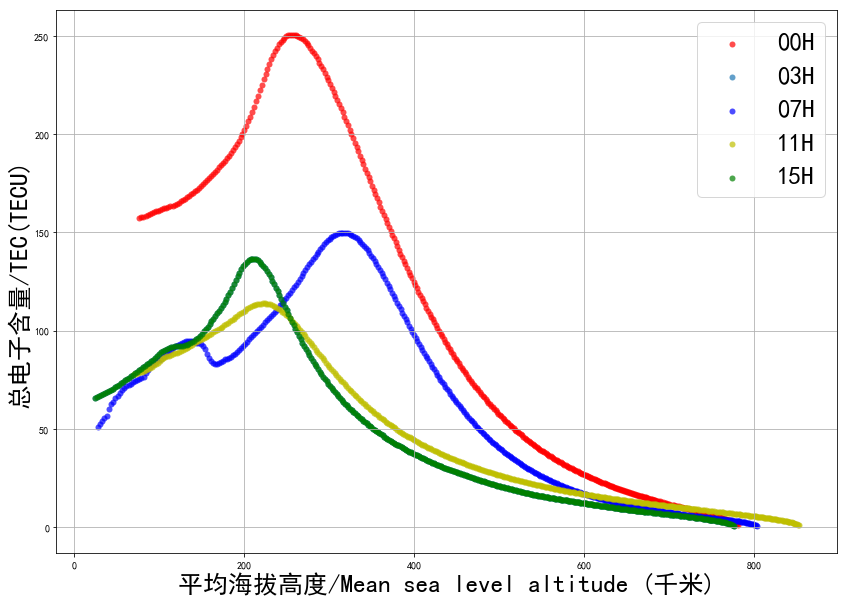

In [66]:
plt.figure(figsize=(14,10))

k=0

x0 = np.empty(a[k])
y0 = np.empty(a[k])

nc1 = Dataset(pp[k])
x = nc1.variables['MSL_alt']
y = nc1.variables['TEC_cal']

for i in np.arange(0,a[k],1):
    x0[i] = x[i]
    y0[i] = y[i]
    
k=1

x1 = np.empty(a[k])
y1 = np.empty(a[k])

nc1 = Dataset(pp[k])
x = nc1.variables['MSL_alt']
y = nc1.variables['TEC_cal']

for i in np.arange(0,a[k],1):
    x1[i] = x[i]
    y1[i] = y[i]    
    
k=2

x2 = np.empty(a[k])
y2 = np.empty(a[k])

nc1 = Dataset(pp[k])
x = nc1.variables['MSL_alt']
y = nc1.variables['TEC_cal']

for i in np.arange(0,a[k],1):
    x2[i] = x[i]
    y2[i] = y[i]    
    
k=3

x3 = np.empty(a[k])
y3 = np.empty(a[k])

nc1 = Dataset(pp[k])
x = nc1.variables['MSL_alt']
y = nc1.variables['TEC_cal']

for i in np.arange(0,a[k],1):
    x3[i] = x[i]
    y3[i] = y[i]
    
k=4

x4 = np.empty(a[k])
y4 = np.empty(a[k])

nc1 = Dataset(pp[k])
x = nc1.variables['MSL_alt']
y = nc1.variables['TEC_cal']

for i in np.arange(0,a[k],1):
    x4[i] = x[i]
    y4[i] = y[i]
    

    
    
plt.scatter(x0[10:],y0[10:],color='r',marker='o',linewidths=0.01,alpha=0.7, label = '00H')
plt.scatter(x1[10:],y1[10:],color='b',marker='o',linewidths=0.01,alpha=0.7, label = '07H')
plt.scatter(x2[10:],y2[10:],color='y',marker='o',linewidths=0.01,alpha=0.7, label = '11H')
plt.scatter(x3[10:],y3[10:],color='g',marker='o',linewidths=0.01,alpha=0.7, label = '15H')


plt.xlabel('平均海拔高度/Mean sea level altitude (千米)',fontsize=25)
plt.ylabel('总电子含量/TEC(TECU)',fontsize=25)

plt.grid(True)
plt.legend(loc = 'best',fontsize=25)
plt.show